In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [25]:
file_path = 'data/deflection_method_shower_dist/ginneken.hdf5'
f = h5py.File(file_path)
keys = [key for key in f.keys()]
f.close()
keys

['E1000_highland_v_cut0_001_e_cutinf',
 'E1000_highland_v_cut0_05_e_cut500',
 'E1000_highlandintegral_v_cut0_001_e_cutinf',
 'E1000_highlandintegral_v_cut0_05_e_cut500',
 'E1000_moliere_v_cut0_001_e_cutinf',
 'E1000_moliere_v_cut0_05_e_cut500',
 'E1000_moliereinterpol_v_cut0_001_e_cutinf',
 'E1000_moliereinterpol_v_cut0_05_e_cut500']

In [26]:
df_dict = {}
for key in keys:
    print(key)
    df_dict[key] = pd.read_hdf(file_path, key=key)

E1000_highland_v_cut0_001_e_cutinf
E1000_highland_v_cut0_05_e_cut500
E1000_highlandintegral_v_cut0_001_e_cutinf
E1000_highlandintegral_v_cut0_05_e_cut500
E1000_moliere_v_cut0_001_e_cutinf
E1000_moliere_v_cut0_05_e_cut500
E1000_moliereinterpol_v_cut0_001_e_cutinf
E1000_moliereinterpol_v_cut0_05_e_cut500


In [27]:
df_dict['E1000_highland_v_cut0_05_e_cut500']

,x,y,z,pos_x,pos_y,pos_z,zenith,azimuth,propagated_distances,deflection,lateral_disp
0,-0.012729,0.001633,0.999918,-348.526859,-335.749580,208933.882259,0.012834,3.014038,208936.980807,0.012834,0.012833
1,0.004033,-0.002845,0.999988,257.577699,195.818486,154601.834591,0.004936,-0.614325,154602.908852,0.004936,0.004935
2,-0.010364,0.005047,0.999934,-410.777998,-113.978624,287082.102001,0.011528,2.688433,287083.651828,0.011528,0.011527
3,0.056159,0.011201,0.998359,1153.245016,-147.857812,230766.280607,0.057297,0.196866,230774.947929,0.057297,0.057265
4,-0.045592,0.032572,0.998429,113.943799,355.753182,305174.355746,0.056061,2.521252,305175.972708,0.056061,0.056031
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.009593,-0.004977,0.999942,-81.946733,-68.746311,176079.558940,0.010808,-2.663044,176081.147028,0.010808,0.010808
9996,0.001853,0.023344,0.999726,731.305653,545.957854,304627.366924,0.023419,1.491580,304631.912308,0.023419,0.023417
9997,-0.007455,0.004760,0.999961,-351.536507,33.868973,280739.738200,0.008845,2.573326,280741.071005,0.008845,0.008845
9998,0.003840,0.026239,0.999648,44.873903,468.299810,110150.914947,0.026522,1.425498,110154.505468,0.026522,0.026519


3.1873025920267897
1.387261237846983
3.3273808266792013
3.8272208097534723
3.5592191109472218
1.3712009631365976
3.5909152821639774
1.3601045295559775


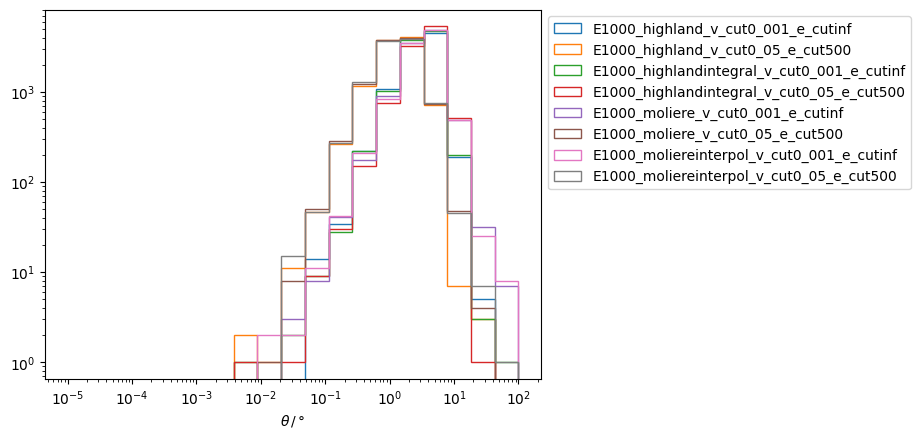

In [28]:
bins = np.logspace(-5, 2, 20)
for key in df_dict.keys():
    print(np.median(np.rad2deg(df_dict[key].deflection)))
    plt.hist(np.rad2deg(df_dict[key].deflection), bins=bins, histtype='step', label=key)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,°$')
plt.legend(bbox_to_anchor=(1,1))

In [29]:
file_path = 'data/deflection_method_shower_dist/MS_only.hdf5'
f = h5py.File(file_path)
keys = [key for key in f.keys()]
f.close()

df_dict = {}
for key in keys:
    print(key)
    df_dict[key] = pd.read_hdf(file_path, key=key)

E1000_highland_v_cut0_001_e_cutinf_MS_only
E1000_highland_v_cut0_05_e_cut500_MS_only
E1000_highlandintegral_v_cut0_001_e_cutinf_MS_only
E1000_highlandintegral_v_cut0_05_e_cut500_MS_only
E1000_moliere_v_cut0_001_e_cutinf_MS_only
E1000_moliere_v_cut0_05_e_cut500_MS_only
E1000_moliereinterpol_v_cut0_001_e_cutinf_MS_only
E1000_moliereinterpol_v_cut0_05_e_cut500_MS_only


3.172372002836674
1.3643723615358332
3.2122768447657166
3.7531854875283903
3.452276812647435
1.363388666204297
3.402678016445318
1.3267292885063964


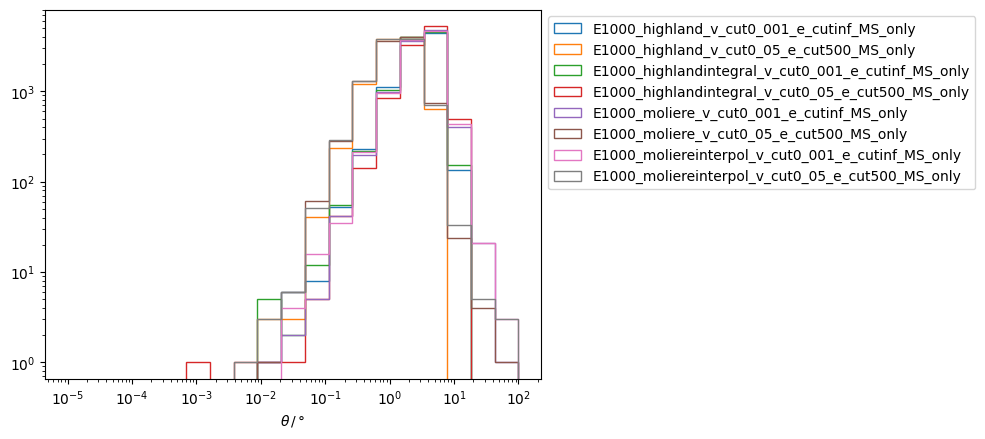

In [30]:
bins = np.logspace(-5, 2, 20)
for key in df_dict.keys():
    print(np.median(np.rad2deg(df_dict[key].deflection)))
    plt.hist(np.rad2deg(df_dict[key].deflection), bins=bins, histtype='step', label=key)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,°$')
plt.legend(bbox_to_anchor=(1,1))